In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64': 
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.vector_gen import *
from Utils.w2b_encoding_lw import *
from Models.RNN_paper_prototype import *
from Utils.metrics_summary import *

2024-04-15 14:00:16.575659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 14:00:16.575703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 14:00:16.576610: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 14:00:16.581738: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 14:00:17.246999: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-15 14:00:17.886275: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 14:00:17.921645: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 14:00:17.921864: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
original_df = dataframe_init(gpu_token)[0]
vectors = vec_split(original_df)
vectors = encoder(vectors)
tensors = tensor_gen(vectors)

/home/ucdasec/Faulthunter-RNN-approach/Utils/w2b_encoding_lw.py:78: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/home/ucdasec/Faulthunter-RNN-appr

In [5]:
vectors[0]

,File,Line Number,Original Line Number,Lines,Encoded Lines,Label
0,AX3_Firmware main.c,203,269,<start> #endif <end>,"[1, 1]","[0, 1]"
1,tc-iot-sdk-embedded main.c,4480,110,<start> static void esp_wifi_initialise ( void...,"[1, 1]","[0, 1]"
2,MicroBros-SmartHome main.c,3061,34,<start> Temp_initialize ( ) ; <end>,"[1, 1]","[0, 1]"
3,Hardware-Bitcoin-Wallet xex.c,1284,472,"<start> fscanf ( f , ""%02x"" , &value ) ; <...","[1, 1]","[0, 1]"
4,sef-project main.c,3507,51,"<start> asm ( ""NOP"" ) ; <end>","[1, 1]","[0, 1]"
...,...,...,...,...,...,...
2847,SmartLock_HardwareDriver main.c,4002,24,<start> u8 modeFlag = 0 ; <end>,"[1, 1]","[0, 1]"
2848,iotkit-embedded iotx_http_api.c,1996,504,<start> } <end>,"[1, 1]","[0, 1]"
2849,MicroBros-SmartHome main.c,3060,33,<start> PIR_initialize ( ) ; <end>,"[1, 1]","[0, 1]"
2850,Hardware-Bitcoin-Wallet xex.c,1336,528,<start> } <end>,"[1, 1]","[0, 1]"


In [20]:
from keras import layers
def model_ver_10(input_shape):
    model = keras.Sequential()

    model.add(layers.Input((input_shape, 1)))
    model.add(layers.Conv1D(16, kernel_size = 2))
    model.add(layers.Dense(16, activation=keras.activations.relu))        
    model.add(layers.Dense(2, activation = keras.activations.softmax))

    model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001), loss=keras.losses.binary_crossentropy,
                metrics=["accuracy"], run_eagerly=True)
    return model


In [5]:
model = model_ver_0(tensors[0][0].shape[0])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 2, 1024)           1050624   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 2, 1024)           2098176   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1024)              2098176   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 2)                

In [6]:
history = model.fit(tensors[0], tensors[3], epochs=50, validation_data=(tensors[1],tensors[4]))
y_pred = model.predict(tensors[2])

Epoch 1/50
90/90 [==============================] - 6s 47ms/step - loss: 24.5599 - accuracy: 0.9723 - val_loss: 18.7081 - val_accuracy: 0.9755
Epoch 2/50
90/90 [==============================] - 4s 46ms/step - loss: 14.6568 - accuracy: 0.9762 - val_loss: 11.0634 - val_accuracy: 0.9755
Epoch 3/50
90/90 [==============================] - 4s 46ms/step - loss: 8.5890 - accuracy: 0.9762 - val_loss: 6.4092 - val_accuracy: 0.9755
Epoch 4/50
90/90 [==============================] - 4s 46ms/step - loss: 4.9092 - accuracy: 0.9762 - val_loss: 3.5979 - val_accuracy: 0.9755
Epoch 5/50
90/90 [==============================] - 4s 46ms/step - loss: 2.7478 - accuracy: 0.9762 - val_loss: 1.9868 - val_accuracy: 0.9755
Epoch 6/50
90/90 [==============================] - 4s 46ms/step - loss: 1.5061 - accuracy: 0.9762 - val_loss: 1.0902 - val_accuracy: 0.9755
Epoch 7/50
90/90 [==============================] - 4s 46ms/step - loss: 0.8293 - accuracy: 0.9762 - val_loss: 0.6013 - val_accuracy: 0.9755
Epoch 8/5

In [7]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[5]))

In [8]:
score_summary(classified_labels, classified_outputs, 0)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
print('#########################################\n')
score_summary(classified_labels, classified_outputs, 1)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))

For secure:
f1 score:  0.9875930521091811
precision score:  0.9754901960784313
recall score:  0

true_positives: 796
true_negetives: 0
false_positives: 20
false_negetives: 0

#########################################

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0

true_positives: 0
true_negetives: 796
false_positives: 0
false_negetives: 20



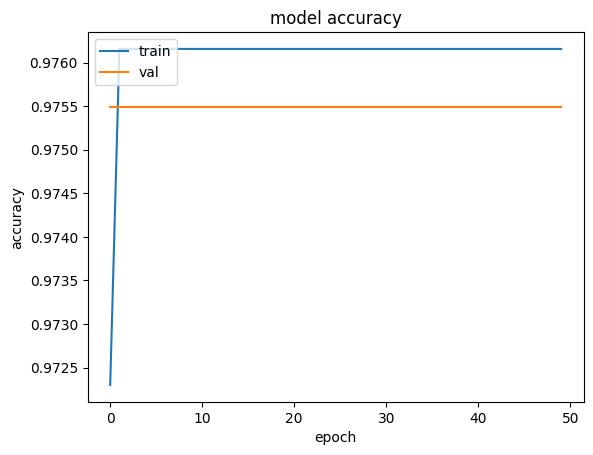

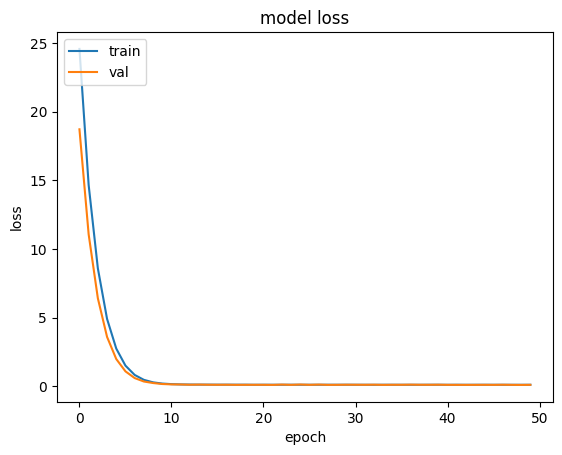

In [9]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
!nvidia-smi

Mon Apr 15 03:24:18 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 27%   37C    P2    29W / 151W |   7888MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (6/6), 42.53 KiB | 2.24 MiB/s, done.
From https://github.com/sakshmenon/Faulthunter-RNN-approach
   3270fd6..fd37b50  dev        -> origin/dev
Updating 3270fd6..fd37b50
Fast-forward
 Scripts/tester.ipynb     | 20708 +--------------------------------------------
 Utils/w2b_encoding_lw.py |     2 +
 2 files changed, 185 insertions(+), 20525 deletions(-)
